# 数据加载阶段

    把训练数据读进来  训练数据不外乎这三种：图片、文本以及类似二维表那样的结构化数据。
    
    不管使用 PyTorch 还是 TensorFlow，或者是传统机器学习的 scikit-learn，我们在读入数据这一块，都会先把数据转换成 NumPy 的数组，然后再进行后续的一系列操作。
    
    对于图片的处理，我们一般会使用 Pillow 与 OpenCV 这两个模块。
    
    
    用 Pillow 与 OpenCV 读入，然后转换为 NumPy 的数组。

## Pillow 方式


In [98]:

from PIL import Image
im = Image.open('test.jpg')
im.size

(427, 640)


* Pillow 是以二进制形式读入保存的
* 利用 NumPy 的 asarray 方法，就可以将 Pillow 的数据转换为 NumPy 的数组格式

In [117]:

import numpy as np

im_pillow = np.asarray(im)

im_pillow

array([[[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [206, 209, 214],
        [206, 209, 214],
        [205, 208, 213]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [207, 210, 215],
        [206, 209, 214],
        [206, 209, 214]],

       [[247, 247, 247],
        [247, 247, 247],
        [247, 247, 247],
        ...,
        [210, 211, 216],
        [209, 210, 215],
        [207, 210, 215]],

       ...,

       [[ 58,  58,  58],
        [ 79,  77,  56],
        [106,  97,  68],
        ...,
        [114, 117, 122],
        [113, 116, 121],
        [113, 117, 120]],

       [[ 64,  59,  65],
        [ 81,  88,  44],
        [ 77,  84,  17],
        ...,
        [ 96,  97, 102],
        [ 93,  94,  98],
        [ 89,  90,  94]],

       [[ 68,  64,  65],
        [ 97,  92,  24],
        [133, 134,   4],
        ...,
        [ 79,  87,  90],
        [ 85,  93,  96],
        [ 90,  98, 101]]

## OpenCV 方式

In [100]:
!pip install opencv-python -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [103]:

import cv2
im_cv2 = cv2.imread('test.jpg')
type(im_cv2)

im_cv2.shape


(640, 427, 3)

Pillow 读入后通道的顺序就是 R、G、B
OpenCV 读入后顺序是 B、G、R
 
**为什么OPENCV是BGR?

### 索引与切片

    NumPy 数组的索引方式与 Python 的列表的索引方式相同，也同样支持切片索引。
    ：”代表全部选中的意思

In [112]:
im_pillow_c1 = im_pillow[:, :, 0]
im_pillow_c2 = im_pillow[:, :, 1]
im_pillow_c3 = im_pillow[:, :, 2]


In [113]:
im_pillow_c1

array([[247, 247, 247, ..., 206, 206, 205],
       [247, 247, 247, ..., 207, 206, 206],
       [247, 247, 247, ..., 210, 209, 207],
       ...,
       [ 58,  79, 106, ..., 114, 113, 113],
       [ 64,  81,  77, ...,  96,  93,  89],
       [ 68,  97, 133, ...,  79,  85,  90]], dtype=uint8)

In [114]:
im_pillow_c2

array([[247, 247, 247, ..., 209, 209, 208],
       [247, 247, 247, ..., 210, 209, 209],
       [247, 247, 247, ..., 211, 210, 210],
       ...,
       [ 58,  77,  97, ..., 117, 116, 117],
       [ 59,  88,  84, ...,  97,  94,  90],
       [ 64,  92, 134, ...,  87,  93,  98]], dtype=uint8)

In [115]:
im_pillow_c3

array([[247, 247, 247, ..., 214, 214, 213],
       [247, 247, 247, ..., 215, 214, 214],
       [247, 247, 247, ..., 216, 215, 215],
       ...,
       [ 58,  56,  68, ..., 122, 121, 120],
       [ 65,  44,  17, ..., 102,  98,  94],
       [ 65,  24,   4, ...,  90,  96, 101]], dtype=uint8)

In [106]:
zeros = np.zeros((im_pillow.shape[0], im_pillow.shape[1], 1))
zeros.shape

(640, 427, 1)

###  数组的拼接

#### np.concatenate()
    
    np.concatenate((a1, a2, …), axis=0) 

In [107]:
im_pillow_c1_3ch = np.concatenate((im_pillow_c1, zeros, zeros),axis=2)

AxisError: axis 2 is out of bounds for array of dimension 2

#### 统一维度

    要合并的两个数组维度不一样
    
##### 方法一：使用 np.newaxis

    PyTorch   unsqueeze(),
    TensorFlow   tf.newaxis 

In [119]:

im_pillow_c1 = im_pillow_c1[:, :, np.newaxis]
im_pillow_c1.shape

im_pillow_c2 = im_pillow_c2[:, :, np.newaxis]
im_pillow_c3 = im_pillow_c3[:, :, np.newaxis]



In [120]:
im_pillow_c1_4ch = np.concatenate((im_pillow_c1, zeros, zeros),axis=2)
im_pillow_c1_4ch.shape

im_pillow_c2_4ch = np.concatenate((zeros,im_pillow_c2,  zeros),axis=2)
im_pillow_c2_4ch.shape

im_pillow_c3_4ch = np.concatenate(( zeros, zeros,im_pillow_c3,),axis=2)
im_pillow_c3_4ch.shape


(640, 427, 3)

##### 方法二：直接赋值

In [121]:

im_pillow_c2_3ch = np.zeros(im_pillow.shape)
im_pillow_c2_3ch[:,:,1] = im_pillow_c2

im_pillow_c3_3ch = np.zeros(im_pillow.shape)
im_pillow_c3_3ch[:,:,2] = im_pillow_c3

ValueError: could not broadcast input array from shape (640,427,1) into shape (640,427)

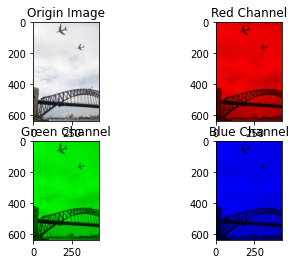

In [122]:

from matplotlib import pyplot as plt
plt.subplot(2, 2, 1)
plt.title('Origin Image')
plt.imshow(im_pillow)
# plt.axis('off')
plt.subplot(2, 2, 2)
plt.title('Red Channel')
plt.imshow(im_pillow_c1_4ch.astype(np.uint8))
# plt.axis('off')
plt.subplot(2, 2, 3)
plt.title('Green Channel')
plt.imshow(im_pillow_c2_4ch.astype(np.uint8))
# plt.axis('off')
plt.subplot(2, 2, 4)
plt.title('Blue Channel')
plt.imshow(im_pillow_c3_4ch.astype(np.uint8))
# plt.axis('off')
plt.savefig('./rgb_pillow.png', dpi=150)

## 深拷贝（副本）与浅拷贝（视图)

浅拷贝或称视图，指的是与原数组共享数据的数组，请注意，只是数据，没有说共享形状。视图我们通常使用 view() 来创建
深拷贝使用 copy() 方法。

np.array() 属于深拷贝，np.asarray() 则是浅拷贝。

# 模型评估

## 问题 找出概率最大的前 5 个类别呢？


##  Argmax Vs Argmin：求最大 / 最小值对应的索引

    NumPy 的 argmax(a, axis=None) 方法可以为我们解决求最大值索引的问题。如果不指定 axis，则将数组默认为 1 维。
    
## Argsort：数组排序后返回原数组的索引

In [42]:

probs = np.array([0.075, 0.15, 0.075, 0.15, 0.0, 0.05, 0.05, 0.2, 0.25])
probs

array([0.075, 0.15 , 0.075, 0.15 , 0.   , 0.05 , 0.05 , 0.2  , 0.25 ])

##  argsort(a, axis=-1, kind=None) 

* a 是要进行排序的原数组；
* axis 是要沿着哪一个轴进行排序，默认是 -1，也就是最后一个轴；
* kind 是采用什么算法进行排序，默认是快速排序，还有其他排序算法，具体你可以看看数据结构的排序算法。

In [44]:

probs_idx_sort = np.argsort(-probs)  #注意，加了负号，是按降序排序
probs_idx_sort

probs_idx_sort[:3]


array([8, 7, 1])

# 小节

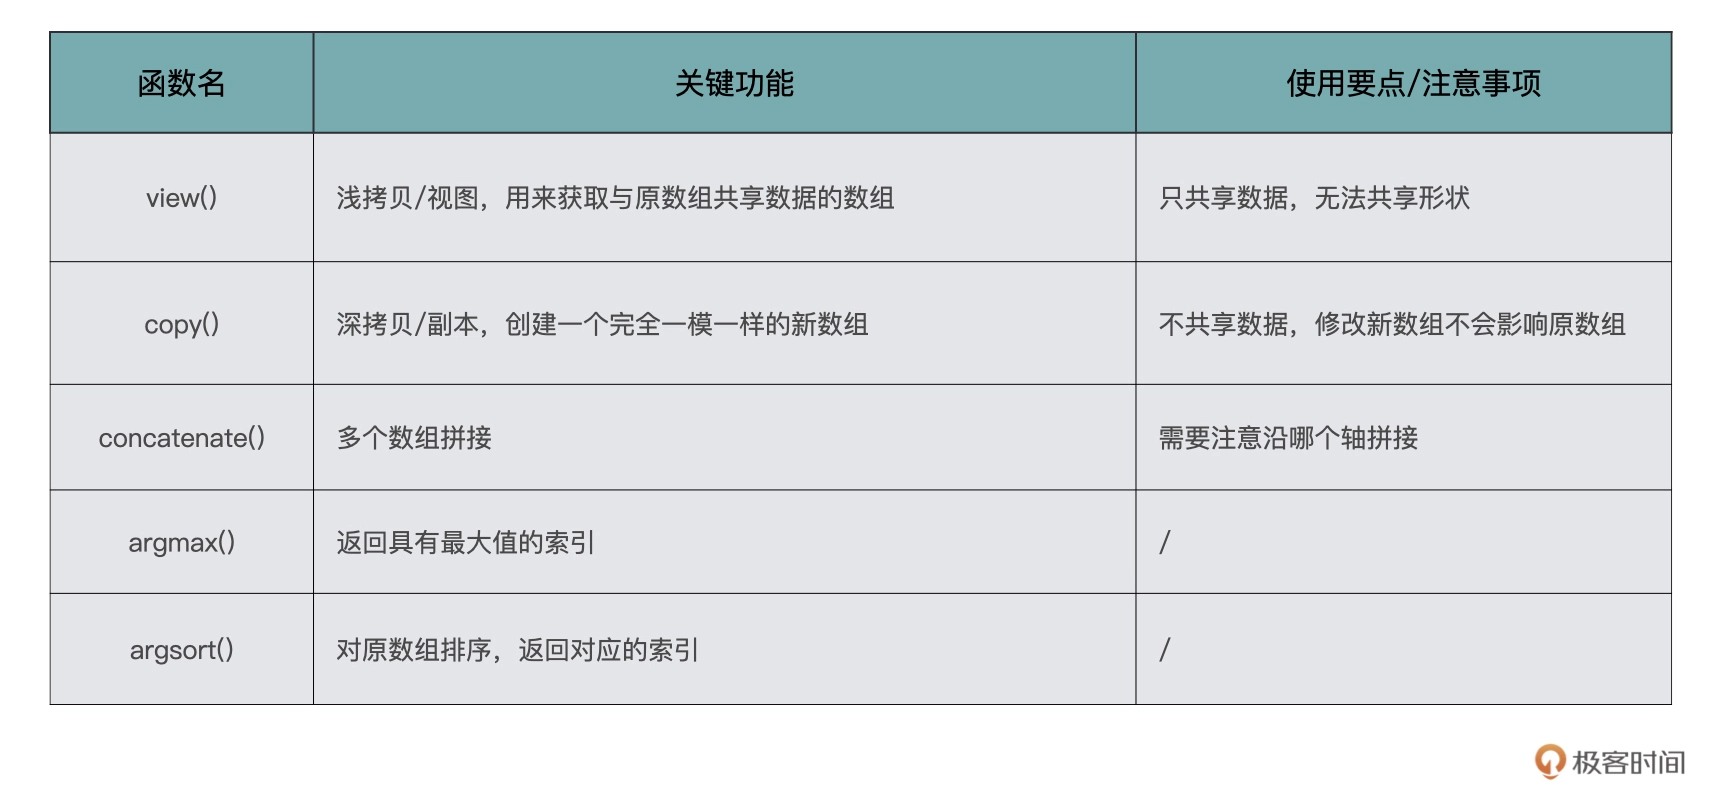

# 每课一练

In [45]:
import numpy as np 



scores=np.random.rand(256,256,2)

scores[:,:,0]=1-scores[:,:,1]

mask=np.argmax(scores,axis=2)

print(mask)

[[0 0 0 ... 0 1 1]
 [0 1 1 ... 1 0 1]
 [0 0 1 ... 0 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 1 1 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [47]:
result = (scores[:, :, 0] < scores[:, :, 1]).astype('int')
result

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])